#Header

Title: K-Nearest Neighbors

Author: Abdulrahman Abed

Date: 03/30/2022


#Task I: Setup, Data Importation, and Data Preparation

##Packages & Random Seed Fix 

In [ ]:
# Mathematics and Statistics Packages
import numpy as np
import pandas as pd
import math

# Graphical Packages
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Colab Packages
from google.colab import drive
from google.colab import data_table

# Data Preparation Packages
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate

# Modeling Packages: K-Nearest Neighbors (KNN) Classifier and Regressor & Gaussian Normalization
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyClassifier
from sklearn.dummy import DummyRegressor

# Hyperparameter Tuning Packages
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score

# Model Evaluation Packages
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

import re
import string
from collections import defaultdict, Counter
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Suppress Warning Messages
import warnings
warnings.filterwarnings('ignore')

In [ ]:
random_state = 0

##1- B) Mount & Import

In [ ]:
%%capture
drive.mount('/content/gdrive')

df = pd.read_csv('/content/gdrive/MyDrive/Data_Sets/CD_additional_modified.csv')

##1- C) Dataframe Summary & Structure

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp_var_rate    4119 non-null   float64
 16  cons_price_idx  4119 non-null   float64
 17  cons_conf_idx   4119 non-null   f

In [ ]:
df.describe(include='all')

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
count,4119.000000,4119,4119,4119,4119,4119,4119,4119,4119,4119,...,4119.000000,4119.000000,4119.000000,4119,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119
unique,NaN,12,4,8,3,3,3,2,10,5,...,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,2
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,thu,...,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,no
freq,NaN,1012,2509,1264,3315,2175,3349,2652,1378,860,...,NaN,NaN,NaN,3523,NaN,NaN,NaN,NaN,NaN,3668
mean,40.113620,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.537266,960.422190,0.190337,NaN,0.084972,93.579704,-40.499102,3.621356,5166.481695,NaN
std,10.313362,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.568159,191.922786,0.541788,NaN,1.563114,0.579349,4.594578,1.733591,73.667904,NaN
min,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,0.000000,0.000000,NaN,-3.400000,92.201000,-50.800000,0.635000,4963.600000,NaN
25%,32.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,999.000000,0.000000,NaN,-1.800000,93.075000,-42.700000,1.334000,5099.100000,NaN
50%,38.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.000000,999.000000,0.000000,NaN,1.100000,93.749000,-41.800000,4.857000,5191.000000,NaN
75%,47.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.000000,999.000000,0.000000,NaN,1.400000,93.994000,-36.400000,4.961000,5228.100000,NaN


In [ ]:
df.head(15)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
5,32,services,single,university.degree,no,no,no,cellular,sep,thu,...,3,999,2,failure,-1.1,94.199,-37.5,0.884,4963.6,no
6,32,admin.,single,university.degree,no,yes,no,cellular,sep,mon,...,4,999,0,nonexistent,-1.1,94.199,-37.5,0.879,4963.6,no
7,41,entrepreneur,married,university.degree,unknown,yes,no,cellular,nov,mon,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
8,31,services,divorced,professional.course,no,no,no,cellular,nov,tue,...,1,999,1,failure,-0.1,93.200,-42.0,4.153,5195.8,no
9,35,blue-collar,married,basic.9y,unknown,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no


##1- D)   Extract Target

In [ ]:
y_target = df.pop('y')
y_target = pd.get_dummies(y_target,drop_first=True)
df['y_target'] = y_target

##1- E) Convert Datatypes

In [ ]:
integer_columns_list = list(df.select_dtypes(include='int64').columns)
df[integer_columns_list] = df[integer_columns_list].astype('float')

object_columns_list = list(df.select_dtypes(include='object').columns)
df[object_columns_list] = df[object_columns_list].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             4119 non-null   float64 
 1   job             4119 non-null   category
 2   marital         4119 non-null   category
 3   education       4119 non-null   category
 4   default         4119 non-null   category
 5   housing         4119 non-null   category
 6   loan            4119 non-null   category
 7   contact         4119 non-null   category
 8   month           4119 non-null   category
 9   day_of_week     4119 non-null   category
 10  duration        4119 non-null   float64 
 11  campaign        4119 non-null   float64 
 12  pdays           4119 non-null   float64 
 13  previous        4119 non-null   float64 
 14  poutcome        4119 non-null   category
 15  emp_var_rate    4119 non-null   float64 
 16  cons_price_idx  4119 non-null   float64 
 17  cons_conf_idx 

##1- F) Encode Dataframe & Sanity check

In [ ]:
category_columns_list = list(df.select_dtypes(include='category').columns)
float_columns_list = list(df.select_dtypes(include='float64').columns)
onehot_df = pd.get_dummies(df,columns=category_columns_list)

In [ ]:
onehot_df.shape

(4119, 64)

###Sanity Check

In [ ]:
print("Number of job Variables: "+str(len(df['job'].unique())))
print("Number of marital Variables: "+str(len(df['marital'].unique())))
print("Number of education Variables: "+str(len(df['education'].unique())))
print("Number of default Variables: "+str(len(df['default'].unique())))
print("Number of housing Variables: "+str(len(df['housing'].unique())))
print("Number of loan Variables: "+str(len(df['loan'].unique())))
print("Number of contact Variables: "+str(len(df['contact'].unique())))
print("Number of month Variables: "+str(len(df['month'].unique())))
print("Number of day_of_week Variables: "+str(len(df['day_of_week'].unique())))
print("Number of poutcome Variables: "+str(len(df['poutcome'].unique())))
print("Number of Float Variables: "+str(len(float_columns_list)))
print("Number of Dependent Variables: 1")

Number of job Variables: 12
Number of marital Variables: 4
Number of education Variables: 8
Number of default Variables: 3
Number of housing Variables: 3
Number of loan Variables: 3
Number of contact Variables: 2
Number of month Variables: 10
Number of day_of_week Variables: 5
Number of poutcome Variables: 3
Number of Float Variables: 10
Number of Dependent Variables: 1


In [ ]:
number_of_variables = 12 + 4 + 8 + 3 + 3 + 3 + 2 + 10 + 5 + 3 + 10 + 1
print("Total Number of Variables in One-Hot Encoded Dataframe: "+str(number_of_variables))

Total Number of Variables in One-Hot Encoded Dataframe: 64


#Task II: Standardize the Data

##2- A) Rescaling

In [ ]:
onehot_scaled_df = pd.DataFrame(StandardScaler().fit_transform(onehot_df.drop('y_target',axis=1)),columns=onehot_df.drop('y_target',axis=1).columns)
onehot_scaled_df['y_target'] = onehot_df['y_target']

##2- B) Splitting

In [ ]:
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(onehot_scaled_df.drop('y_target',axis=1),
                                                                              onehot_scaled_df['y_target'],
                                                                              test_size=0.3,
                                                                              random_state=random_state)

In [ ]:
# Independent/Dependent Variable Split of Full Dataset for future Cross-Validation

X_full_scaled = onehot_scaled_df.drop('y_target',axis=1)
y_full = onehot_scaled_df['y_target']

#Task III: Hyperparameter Tuning

##3- A) Sequential Grid Search

In [ ]:
parameters = {'n_neighbors': [K for K in range(1,51,2)],
              'p': [p for p in range(1,3)]  
              }
sequential_knn_tuning_grid = GridSearchCV(KNeighborsClassifier(),parameters,cv=10,scoring='f1',verbose=3)
sequential_knn_tuning_grid.fit(X_train_scaled,y_train)

Fitting 10 folds for each of 50 candidates, totalling 500 fits
[CV 1/10] END ...............n_neighbors=1, p=1;, score=0.438 total time=   0.2s
[CV 2/10] END ...............n_neighbors=1, p=1;, score=0.281 total time=   0.1s
[CV 3/10] END ...............n_neighbors=1, p=1;, score=0.317 total time=   0.0s
[CV 4/10] END ...............n_neighbors=1, p=1;, score=0.231 total time=   0.1s
[CV 5/10] END ...............n_neighbors=1, p=1;, score=0.406 total time=   0.1s
[CV 6/10] END ...............n_neighbors=1, p=1;, score=0.523 total time=   0.1s
[CV 7/10] END ...............n_neighbors=1, p=1;, score=0.357 total time=   0.1s
[CV 8/10] END ...............n_neighbors=1, p=1;, score=0.222 total time=   0.1s
[CV 9/10] END ...............n_neighbors=1, p=1;, score=0.316 total time=   0.1s
[CV 10/10] END ..............n_neighbors=1, p=1;, score=0.353 total time=   0.1s
[CV 1/10] END ...............n_neighbors=1, p=2;, score=0.462 total time=   0.0s
[CV 2/10] END ...............n_neighbors=1, p=

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21,
                                         23, 25, 27, 29, 31, 33, 35, 37, 39, 41,
                                         43, 45, 47, 49],
                         'p': [1, 2]},
             scoring='f1', verbose=3)

##3- B) Results

In [ ]:
sequential_knn_tuning_grid_df = pd.DataFrame(sequential_knn_tuning_grid.cv_results_)
sequential_knn_tuning_grid_df = sequential_knn_tuning_grid_df.drop(columns=['mean_score_time','std_score_time','mean_fit_time','std_fit_time'])
print("Hyperparameter Search Grid Size: "+str(sequential_knn_tuning_grid_df.shape))

Hyperparameter Search Grid Size: (100, 11)


##3- C) Best Model

In [ ]:
sequential_knn_tuning_grid_df.sort_values('mean_test_score',ascending=False).head(5)

,param_n_neighbors,param_p,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
2,2,1,"{'n_neighbors': 2, 'p': 1}",0.240964,0.186667,0.250000,0.233766,0.160000,0.214279,0.034861,100
3,2,2,"{'n_neighbors': 2, 'p': 2}",0.240964,0.227848,0.266667,0.230769,0.157895,0.224829,0.036153,99
6,4,1,"{'n_neighbors': 4, 'p': 1}",0.285714,0.233766,0.329670,0.233766,0.233766,0.263337,0.038792,98
10,6,1,"{'n_neighbors': 6, 'p': 1}",0.261905,0.225000,0.355556,0.296296,0.233766,0.274505,0.047567,97
7,4,2,"{'n_neighbors': 4, 'p': 2}",0.348837,0.216867,0.337079,0.282353,0.227848,0.282597,0.054174,96


In [ ]:
best_sequential_regression_model = sequential_knn_tuning_grid.best_estimator_
best_sequential_regression_model

KNeighborsClassifier(n_neighbors=7)

##3- D) Plot

In [ ]:
sequential_predictions_test = best_sequential_regression_model.predict(X_test_scaled)

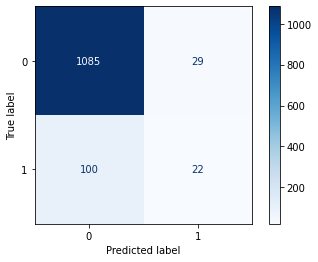

In [ ]:
con_mat_test = confusion_matrix(y_test,sequential_predictions_test,labels=[0,1])
ax = ConfusionMatrixDisplay(confusion_matrix=con_mat_test,display_labels=[0,1])
ax.plot(values_format='',cmap=plt.cm.Blues)
plt.show()

In [ ]:
print(classification_report(y_test,sequential_predictions_test))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      1114
           1       0.43      0.18      0.25       122

    accuracy                           0.90      1236
   macro avg       0.67      0.58      0.60      1236
weighted avg       0.87      0.90      0.88      1236



#Task IV: Show GridSearchCV Results

##4- A) Mean F1 Score vs. Nearest Neighbors

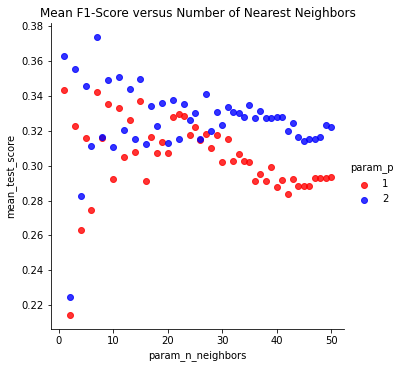

In [ ]:
colors = {1:'red',2:'blue'}
sns.lmplot('param_n_neighbors','mean_test_score',data=sequential_knn_tuning_grid_df,palette=colors,hue='param_p',fit_reg=False)
plt.title("Mean F1-Score versus Number of Nearest Neighbors")
plt.show()

##4- B) Description

*   Overall the euclidean hyperparameter had the best performance in this given dataset. Generally speaking, under both the euclidean & manhattan distance metrics it seems like all our models trend downward in performance as n of nearest-neighbors increases. During the first 1-25 n neighbors, models under both metrics seemed to have volatile outcomes as they spiked up and down. After approximately 25 n neighbors is where the models begin to trend downwards more consistently.

*   The euclidean distance metric worked best for this dataset, while manhattan had the worst performance.

*   The nearest-neighbor values that worked best were 7, 1, 3, & 15 under the euclidean metric. The nearest-neighbor values that performed the worst were 2, 4, & 6 under either metric.

*   The model with optimal hyperparameters had a .37 F-1 score after being fit on the training dataset, while the same model evaluated a .25 F-1 score on the testing set. This shows that our model has great results without being overfitted.

#Task V: IPYNB and HTML Files

##4- A & B)

In [ ]:
%%shell
 jupyter nbconvert --to html Assignment8_Abed_Abdulrahman.ipynb

[NbConvertApp] Converting notebook Assignment8_Abed_Abdulrahman.ipynb to html
[NbConvertApp] Writing 415524 bytes to Assignment8_Abed_Abdulrahman.html
